In [1]:
import math as mt
import numpy as np
from sklearn.datasets import make_classification
import matplotlib.pyplot as plt

In [115]:
def sigmoid(x, w, b):
    w = np.array(w)
    return 1 / (1 + 2.7128 ** (-((w * x).sum() + b)))


def step_gradient(x, y, learning_rate, w, b):
    for i in range(len(x)):
        p = sigmoid(x[i], w, b)
        for j in range(len(w)):
            delta_w = learning_rate*(p-y[i])*x[i][j]
            w[j] -= delta_w
        b -= learning_rate*(p-y[i])
    return w, b


def cost(x, y, w, b):
    total_cost = 0
    for i in range(len(x)):
        p = sigmoid(x[i], w, b)
        total_cost += -y[i] * mt.log(p) - (1-y[i])*mt.log(1-p)
    return total_cost


def fit(x_train, y_train, learning_rate=0.1, max_itr=200):
    w = [0 for i in range(x_train.shape[1])]
    b = 0
    print('START: ', cost(x_train, y_train, w, b))
    for i in range(max_itr):
        w, b = step_gradient(x_train, y_train, learning_rate, w, b)
    print('FINAL: ', cost(x_train, y_train, w, b))
    return w, b


def predict(x, w, b):
    theta_x = (w*x).sum() + b
    if theta_x > 0:
        return 1
    return 0

In [140]:
x, y = make_classification(n_samples=300, n_features=2, n_redundant=0)

In [141]:
w, b = fit(x, y)

START:  207.944154167984
FINAL:  66.78232529844348


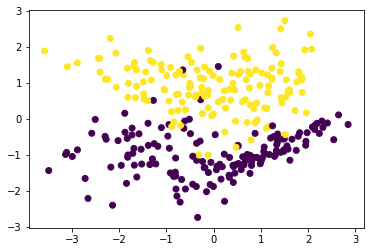

In [142]:
plt.scatter(x[:,0], x[:,1], c=y)
plt.show()

In [143]:
y_pred = []
count = 0
for i in range(len(x)):
    y_pred.append(predict(x[i], w, b))
    if y_pred[i] == y[i]:
        count = count + 1
        
print(count / len(x))

0.92


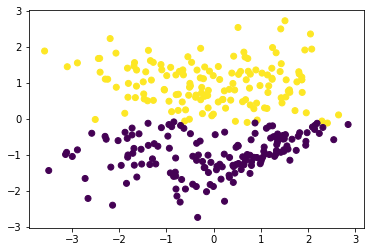

In [144]:
plt.scatter(x[:,0], x[:,1], c=y_pred)
plt.show()